In [1]:
import numpy as np
from scipy.io import loadmat
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split

In [2]:
# data loading
data = loadmat('data1.mat')
X = data['X']
y = data['y']

In [3]:
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=1,train_size=0.7,test_size=0.3)

In [4]:
X.shape

(51, 2)

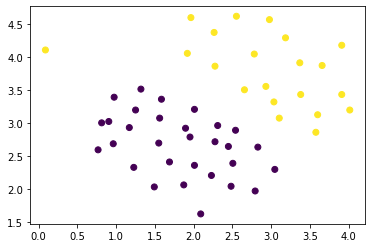

In [5]:
plt.scatter(X[:,0],X[:,1],c = y.flatten())

In [6]:
y_train.shape, X_train.shape

((35, 1), (35, 2))

In [7]:
model=svm.LinearSVC(C=1000000)
model.fit(X_train,y_train.ravel())

c:\users\remta\envs\ai\lib\site-packages\sklearn\svm\_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1000000)

In [8]:
# x0s = np.linspace(0,4,100)
# x1s = np.linspace(1,5,100)
# x0, x1 = np.meshgrid(x0s,x1s)
# X = np.c_[x0.ravel(),x1.ravel()]
# z1=np.array([[1,2,3],[7,8,9],[4,5,6]]).ravel()
# z2=np.array([[1,2,3],[7,8,9],[4,5,6]]).ravel()
# Y = np.c_[z1,z2]
# Y

In [9]:
def plot_predict(model,axes):
    x0s = np.linspace(axes[0],axes[1],100)
    x1s = np.linspace(axes[2],axes[3],100)
    x0, x1 = np.meshgrid(x0s,x1s) 
    X = np.c_[x0.ravel(),x1.ravel()]
    y_pred = model.predict(X).reshape(x0.shape)
    y_decision = model.decision_function(X).reshape(x0.shape)
    plt.contour(x0,x1,y_pred,cmap=plt.cm.winter)
    plt.contour(x0,x1,y_decision,cmap=plt.cm.winter,alpha=0.2)

In [10]:
X_train[:,0],X_train

(array([0.9735, 1.1693, 3.0357, 2.3099, 2.2638, 1.3191, 3.9113, 2.091 ,
        1.4919, 2.2753, 3.5772, 1.5495, 2.6555, 1.2269, 3.3698, 2.5057,
        2.7938, 1.6878, 3.6002, 1.5841, 2.8283, 3.3814, 3.9113, 0.9044,
        2.2753, 3.6579, 1.9643, 3.1855, 4.015 , 3.1048, 2.5518, 2.7822,
        1.9182, 2.2292, 0.962 ]),
 array([[0.9735, 3.3881],
        [1.1693, 2.9276],
        [3.0357, 3.3165],
        [2.3099, 2.9584],
        [2.2638, 4.3706],
        [1.3191, 3.5109],
        [3.9113, 3.4291],
        [2.091 , 1.6177],
        [1.4919, 2.0271],
        [2.2753, 2.7127],
        [3.5772, 2.856 ],
        [1.5495, 2.6923],
        [2.6555, 3.5008],
        [1.2269, 2.3239],
        [3.3698, 3.9101],
        [2.5057, 2.3853],
        [2.7938, 1.9656],
        [1.6878, 2.4057],
        [3.6002, 3.1221],
        [1.5841, 3.3575],
        [2.8283, 2.6309],
        [3.3814, 3.4291],
        [3.9113, 4.1761],
        [0.9044, 3.0198],
        [2.2753, 3.8589],
        [3.6579, 3.8692],
  

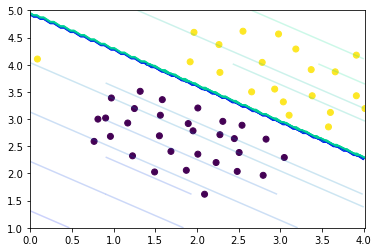

In [11]:
trainPredict = (model.predict(X).reshape(-1, 1))
plt.scatter(X[:,0],X[:,1],c=y.flatten())
plot_predict(model,[0,4,1,5])
plot_predict(model,[X_train[:,0].min(),X_train[:,0].max(),X_train[:,1].min(),X_train[:,0].max()])

In [12]:
y_pred = (model.predict(X_train).reshape(-1, 1))
acc = np.sum(y_pred==y_train)/y_train.shape[0]
print('train_acc:',acc)
y_pred = (model.predict(X_test).reshape(-1, 1))
acc = np.sum(y_pred==y_test)/y_test.shape[0]
print('test_acc:',acc)


train_acc: 1.0
test_acc: 0.9375
